# Assignment Python 2

Robi Dwiputra Satria

PYTN-KS09-024

Studi Independen - Kampus Merdeka

---
## Project Overview

Tujuan dari Assignment 2 ini adalah untuk memperkenalkan pada analisis statistik data dengan Python sekonsisten mungkin. Menggunakan apa yang telah dipelajari; Dataset ini mencakup catatan setiap bangunan atau unit bangunan yang terjual di Dataset NYC Property Sales (pasar properti NYC) selama periode 12 bulan dalam rentang September 2016 - September 2017.

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import statistics
import scipy.stats
from IPython.display import Math, Latex
from IPython.core.display import Image
import seaborn as sns

In [2]:
print('Libraries are already imported!')

Libraries are already imported!


## Import dataset

Dataset NYC Property Sales dalam rentang September 2016 - September 2017, dapat diakses pada [link](https://www.kaggle.com/datasets/new-york-city/nyc-property-sales) berikut ini.

In [3]:
df_nyc = pd.read_csv('nyc-rolling-sales.csv')

In [4]:
# menampilkan 5 baris pertama
df_nyc.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


---
## Pre-processing

### Mengetahui dimensi (baris, kolom) dari dataset

In [5]:
baris, kolom = df_nyc.shape
print(baris, 'baris')
print(kolom, 'kolom')

84548 baris
22 kolom


### Menampilkan fitur DataFrame

In [6]:
# menampilkan daftar fitur/atribut/kolom yang terdapat pada dataset
column_list = df_nyc.columns
print(column_list)

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')


### Melihat tipe data untuk setiap kolom

In [7]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

### Mengetahui jumlah nilai unik setiap kolom

In [8]:
for i in df_nyc:
    print('Jumlah nilai unik untuk kolom {} bernilai {} \n nilai unik = {}'.format
          (i, len(df_nyc[i].unique()), df_nyc[i].unique()))
    print('===============================================================\n')

Jumlah nilai unik untuk kolom Unnamed: 0 bernilai 26736 
 nilai unik = [    4     5     6 ... 26737 26738 26739]

Jumlah nilai unik untuk kolom BOROUGH bernilai 5 
 nilai unik = [1 2 3 4 5]

Jumlah nilai unik untuk kolom NEIGHBORHOOD bernilai 254 
 nilai unik = ['ALPHABET CITY' 'CHELSEA' 'CHINATOWN' 'CIVIC CENTER' 'CLINTON'
 'EAST VILLAGE' 'FASHION' 'FINANCIAL' 'FLATIRON' 'GRAMERCY'
 'GREENWICH VILLAGE-CENTRAL' 'GREENWICH VILLAGE-WEST' 'HARLEM-CENTRAL'
 'HARLEM-EAST' 'HARLEM-UPPER' 'HARLEM-WEST' 'INWOOD' 'JAVITS CENTER'
 'KIPS BAY' 'LITTLE ITALY' 'LOWER EAST SIDE' 'MANHATTAN VALLEY'
 'MIDTOWN CBD' 'MIDTOWN EAST' 'MIDTOWN WEST' 'MORNINGSIDE HEIGHTS'
 'MURRAY HILL' 'ROOSEVELT ISLAND' 'SOHO' 'SOUTHBRIDGE' 'TRIBECA'
 'UPPER EAST SIDE (59-79)' 'UPPER EAST SIDE (79-96)'
 'UPPER EAST SIDE (96-110)' 'UPPER WEST SIDE (59-79)'
 'UPPER WEST SIDE (79-96)' 'UPPER WEST SIDE (96-116)'
 'WASHINGTON HEIGHTS LOWER' 'WASHINGTON HEIGHTS UPPER' 'BATHGATE'
 'BAYCHESTER' 'BEDFORD PARK/NORWOOD' 'BELMONT' 'BRO

**Analisis:** Terdapat _Non-Standard Missing Values_, berikut ini adalah rangkumannya:
1. Kolom "Unnamed" tidak diperlukan, maka akan didrop
2. Kolom "TAX CLASS AT PRESENT" mengandung satu nilai (' ') yang akan diganti menggunakan nilai modus
3. Kolom "EASE-MENT" hanya mengandung satu nilai (' ') yang tidak dapat memberikan informasi, maka fitur tersebut akan didrop
4. Kolom "BUILDING CLASS AT PRESENT" mengandung nilai (' ') yang akan diganti menggunakan nilai modus
5. Kolom "APARTEMENT NUMBER" mengandung nilai (' ') yang akan diganti menggunakan nilai modus
6. Kolom "ZIP CODE" mengandung nilai (0) yang yang diidentifikasi sebagai missing values
7. Kolom "TOTAL UNITS" mengandung nilai (0) yang akan diidentifikasi sebagai missing values
8. Kolom "YEAR BUILT" mengandung nilai (0) yang akan diidentifikasi sebagai missing values
9. Kolom "SALE PRICE" mengandung nilai ('-') yang akan diganti menjadi 0

Sebelum mengganti _Non-Standard Missing Values_ menjadi data yang diharapkan, terlebih dahulu mengubah keseluruhan _Non-Standard Missing Values_ menjadi **Standard Missing Values**.

## Data Cleaning

In [9]:
# mengumpulkan missing values dalam suatu list pada parameter missing_values
missing_values = ['n/a', 'NA', '--', 'na', 'n-a', ' ', ' -  ']
df_nyc = pd.read_csv('nyc-rolling-sales.csv', na_values = missing_values)

In [10]:
# mengganti nilai 0 pada fitur "ZIP CODE", "TOTAL UNITS", DAN "YEAR BUILT" sebagai missing values
df_nyc['ZIP CODE'].replace(0 ,np.nan, inplace = True)
df_nyc['TOTAL UNITS'].replace(0 ,np.nan, inplace = True)
df_nyc['YEAR BUILT'].replace(0 ,np.nan, inplace = True)

In [11]:
# mengecek Non-Standard Missing Values yang sudah diubah menjadi Standard Missing Values
df_nyc.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  65496
ZIP CODE                            982
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                       19762
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                         6970
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

### Menghapus kolom-kolom yang tidak diperlukan

1. Kolom **"Unnamed: 0"** sebagai angka int yang tidak memberikan informasi terkait dataset NYC property sales
2. Kolom **"EASE-MENT"** tidak dibutuhkan untuk analis selanjutnya

In [12]:
df_nyc.drop(['Unnamed: 0', 'EASE-MENT'], axis = 1, inplace = True)

### Mengatasi missing values pada dataset

Digunakan dua nilai sebagai pengganti missing values, yaitu nilai **modus** untuk kolom kategorik dan nilai **median** untuk kolom numerik

### Mengganti missing values pada kolom tipe kategorik dengan nilai modus

In [13]:
df_nyc['TAX CLASS AT PRESENT'].fillna(df_nyc['TAX CLASS AT PRESENT'].mode()[0], inplace = True)
df_nyc['BUILDING CLASS AT PRESENT'].fillna(df_nyc['BUILDING CLASS AT PRESENT'].mode()[0], inplace = True)
df_nyc['APARTMENT NUMBER'].fillna(df_nyc['APARTMENT NUMBER'].mode()[0], inplace = True)
df_nyc['ZIP CODE'].fillna(df_nyc['ZIP CODE'].mode()[0], inplace = True)
df_nyc['YEAR BUILT'].fillna(df_nyc['YEAR BUILT'].mode()[0], inplace = True)

### Mengganti missing values pada kolom tipe numerik dengan nilai median

Missing values (NaN) yang ada pada fitur "TOTAL UNITS" dan "SALE PRICE" tidak memiliki arti, maka dapat diabaikan

In [14]:
df_nyc['LAND SQUARE FEET'].fillna(df_nyc['LAND SQUARE FEET'].median(), inplace = True)
df_nyc['GROSS SQUARE FEET'].fillna(df_nyc['GROSS SQUARE FEET'].median(), inplace = True)

In [15]:
df_nyc.dropna(inplace = True)

### Mengetahui data duplikat pada baris

In [16]:
df_nyc[df_nyc.duplicated()]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
208,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,A4,231 WEST 22ND STREET,4,10011.0,1,0,1.0,1588.0,5653.0,1900.0,1,A4,10.0,2017-01-30 00:00:00
209,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,A4,231 WEST 22ND STREET,4,10011.0,1,0,1.0,1588.0,5653.0,1900.0,1,A4,10.0,2017-01-30 00:00:00
683,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,2,774,1042,R4,252 SEVENTH AVENUE,4K,10001.0,1,0,1.0,2325.0,1680.0,1920.0,2,R4,1500000.0,2016-10-05 00:00:00
2296,1,FINANCIAL,13 CONDOS - ELEVATOR APARTMENTS,2,24,1123,R4,40 BROAD STREET,27A,10004.0,1,0,1.0,2325.0,1680.0,1982.0,2,R4,1200000.0,2017-04-28 00:00:00
3427,1,GRAMERCY,13 CONDOS - ELEVATOR APARTMENTS,2,879,1207,R4,148 EAST 24TH STREET,3E,10010.0,1,0,1.0,2325.0,1680.0,2009.0,2,R4,716000.0,2017-04-07 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83176,5,TODT HILL,01 ONE FAMILY DWELLINGS,1,908,150,A1,3 HELENA ROAD,4,10304.0,1,0,1.0,38862.0,3900.0,1920.0,1,A1,1125000.0,2017-08-02 00:00:00
83207,5,TOMPKINSVILLE,02 TWO FAMILY DWELLINGS,1,114,30,B2,160 CASTLETON AVENUE,4,10301.0,2,0,2.0,5781.0,844.0,1942.0,1,B2,250000.0,2017-06-22 00:00:00
83603,5,WEST NEW BRIGHTON,01 ONE FAMILY DWELLINGS,1,91,31,A1,3 CLINTON COURT,4,10301.0,1,0,1.0,4840.0,2400.0,2005.0,1,A1,585000.0,2016-09-21 00:00:00
83647,5,WEST NEW BRIGHTON,01 ONE FAMILY DWELLINGS,1,155,180,A1,441 OAKLAND AVENUE,4,10310.0,1,0,1.0,10671.0,2464.0,1899.0,1,A1,725000.0,2017-06-30 00:00:00


In [17]:
# mengecek jumlah baris duplikat
rows_of_duplicated = df_nyc.duplicated().sum()
print(rows_of_duplicated)

339


Tedapat 339 baris duplikat untuk dihapus

In [18]:
# menghapus baris duplikat, kecuali baris pertama yang mewakili dari sekian baris duplikat
df_nyc.drop_duplicates(subset=df_nyc.columns, keep='first', inplace=True)

### Mengubah tipe data pada fitur 'SALE DATE' menjadi tipe datetime

In [19]:
df_nyc['SALE DATE'] = pd.to_datetime(df_nyc['SALE DATE'])
df_nyc['SALE DATE'].dtypes

dtype('<M8[ns]')

### Mengubah nilai pada fitur 'BOROUGH' menjadi nilai tipe string

Untuk kebutuhan analisis mengenai pembentukan **confidence intervals** terhadap **proposi populasi** penjualan properti di wilayah NYC

In [20]:
df_nyc['BOROUGH'] = df_nyc.BOROUGH.replace({1 : 'Manhattan', 2 : 'Bronx', 3 : 'Brooklyn',
                                        4 : 'Queens', 5 : 'Staten Island'})

In [21]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52024 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         52024 non-null  object        
 1   NEIGHBORHOOD                    52024 non-null  object        
 2   BUILDING CLASS CATEGORY         52024 non-null  object        
 3   TAX CLASS AT PRESENT            52024 non-null  object        
 4   BLOCK                           52024 non-null  int64         
 5   LOT                             52024 non-null  int64         
 6   BUILDING CLASS AT PRESENT       52024 non-null  object        
 7   ADDRESS                         52024 non-null  object        
 8   APARTMENT NUMBER                52024 non-null  object        
 9   ZIP CODE                        52024 non-null  float64       
 10  RESIDENTIAL UNITS               52024 non-null  int64         
 11  CO

### Deteksi outlier dengan IQR

Suatu dataset dapat dikategorikan sebagai outlier jika:
- Lebih kecil dari Q1 - 1.5 (IQR)
- Lebih besar dari Q3 + 1.5 (IQR)

In [22]:
# Menghitung nilai Q1 dan Q3
Q1 = np.quantile(df_nyc['SALE PRICE'], .25)
Q3 = np.quantile(df_nyc['SALE PRICE'], .75)
# Menghitung nilai IQR
IQR = Q3 - Q1
print('Kuartil 1 = ', Q1)
print('Kuartil 3 = ', Q3)
print('IQR = ', IQR)

Kuartil 1 =  250000.0
Kuartil 3 =  990000.0
IQR =  740000.0


In [23]:
# Menghitung ambang batas outlier
min_IQR = Q1 - 1.5 * IQR
max_IQR = Q3 + 1.5 * IQR

print('IQR minimum = ', min_IQR)
print('IQR maksimum = ', max_IQR)

IQR minimum =  -860000.0
IQR maksimum =  2100000.0


In [24]:
# Menghitung nilai minimum dan maksimum harga penjualan properti
nilai_min = np.min(df_nyc['SALE PRICE'])
nilai_max = np.max(df_nyc['SALE PRICE'])

print('Nilai minimum data = ', nilai_min)
print('Nilai maksimum data = ', nilai_max)

Nilai minimum data =  0.0
Nilai maksimum data =  2210000000.0


### Deteksi outlier pada fitur 'SALE PRICE '

In [25]:
low_out = []
high_out = []

for i in df_nyc['SALE PRICE']:
    if (i < min_IQR):
        low_out.append(i)
    if (i > max_IQR):
        high_out.append(i)

print('Low outlier : ', low_out)
print('High outlier : ', high_out)

Low outlier :  []
High outlier :  [6625000.0, 3936272.0, 8000000.0, 3192840.0, 16232000.0, 10350000.0, 11900000.0, 28000000.0, 52625000.0, 2295759.0, 2150000.0, 2150000.0, 2250000.0, 2611811.0, 4159551.0, 2250000.0, 2392887.0, 4552375.0, 2385000.0, 3300000.0, 7215000.0, 4750000.0, 3035000.0, 2700000.0, 3700000.0, 10800000.0, 52625000.0, 7425000.0, 7750000.0, 8300000.0, 2850000.0, 16000000.0, 5950000.0, 7375000.0, 8000000.0, 14100000.0, 29400000.0, 6450000.0, 5500000.0, 5750000.0, 3485000.0, 4600000.0, 2341975.0, 2560000.0, 2815000.0, 3699000.0, 3020000.0, 2600000.0, 7950000.0, 3210237.0, 5875000.0, 44105000.0, 4650000.0, 2685000.0, 15350000.0, 14650000.0, 2760000.0, 2853850.0, 2599287.0, 2760000.0, 6315900.0, 6875937.0, 7950000.0, 5959512.0, 10490725.0, 13435504.0, 10126700.0, 14563725.0, 10948937.0, 15139625.0, 12018100.0, 15887450.0, 11560349.0, 16466145.0, 12829362.0, 16905700.0, 13443650.0, 17809925.0, 13478450.0, 34623250.0, 33605000.0, 6300000.0, 2800000.0, 2900000.0, 2875000.0, 

In [26]:
median_ = np.median(high_out)
print(median_)

3900000.0


**Analisis:** Terdapat nilai-nilai yang melebihi ambang batas atas (Q3 + 1.5 * IQR), maka dapat dikategorikan sebagai outliers

In [27]:
# mengubah data dalam list menjadi bentuk array untuk memvisualisasikan keberadaan outliers
data_high_outlier = np.array(high_out)

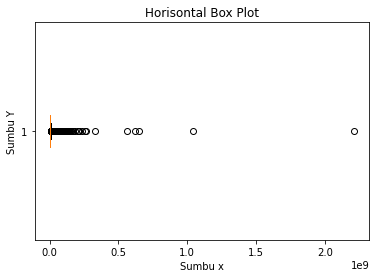

In [28]:
plt.boxplot(data_high_outlier, vert=False) 
# vert merepresentasikan vertikal

plt.title('Horisontal Box Plot')
plt.xlabel('Sumbu x')
plt.ylabel('Sumbu Y')

plt.show()

**Analisis:** Terdapat nilai-nilai yang melebihi ambang batas atas (Q3 + 1.5 * IQR), maka dapat dikategorikan sebagai outliers

In [29]:
# melakukan seleksi baris untuk mengatasi data pencilan
df_nyc = df_nyc[(df_nyc['SALE PRICE'] > 10000) & (df_nyc['SALE PRICE'] < 875875)]

### Deteksi outlier pada fitur 'LAND SQUARE FEET'

In [30]:
low_out_land = []
high_out_land = []

for i in df_nyc['LAND SQUARE FEET']:
    if (i < min_IQR):
        low_out_land.append(i)
    if (i > max_IQR):
        high_out_land.append(i)

print('Low outlier : ', low_out_land)
print('High outlier : ', high_out_land)

Low outlier :  []
High outlier :  [4228300.0]


**Analisis:**  Terdapat nilai yang melebihi ambang batas atas (Q3 + 1.5 * IQR), maka dapat dikategorikan sebagai outliers

In [31]:
# melakukan seleksi baris untuk tidak menyertakan nilai di atas ambang atas (Q3 + 1.5 (IQR))
df_nyc = df_nyc[df_nyc['LAND SQUARE FEET'] <  4228300]

### Deteksi outlier pada fitur 'GROSS SQUARE FEET '

In [32]:
low_out_gross = []
high_out_gross = []

for i in df_nyc['GROSS SQUARE FEET']:
    if (i < min_IQR):
        low_out_gross.append(i)
    if (i > max_IQR):
        high_out_gross.append(i)

print('Low outlier : ', low_out_gross)
print('High outlier : ', high_out_gross)

Low outlier :  []
High outlier :  []


**Analisis:** Tidak terdapat data pencilan baik pada ambang batas bawah (Q1 - 1.5 * IQR) ataupun ambang batas atas (Q3 + 1.5 * IQR)

## Menampilkan DataFrame baru untuk kebutuhan analisis dalam merangkum dan menarik kesimpulan dataset NYC property sales

In [33]:
# mengecek data tidak ada yang missing values
df_nyc.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [34]:
# menampilkan 5 baris pertama DataFrame
df_nyc.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
76,Manhattan,ALPHABET CITY,12 CONDOS - WALKUP APARTMENTS,2,386,1002,R2,211 EAST 3RD STREET,1B,10009.0,1,0,1.0,2325.0,1680.0,1920.0,2,R2,620000.0,2016-12-30
79,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1003,R4,324 EAST 4TH STREET,3A,10009.0,1,0,1.0,2325.0,1680.0,1920.0,2,R4,762669.0,2016-09-21
80,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1004,R4,324 EAST 4TH STREET,3B,10009.0,1,0,1.0,2325.0,1680.0,1920.0,2,R4,772851.0,2016-09-12
85,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1009,R4,324 EAST 4TH STREET,6A,10009.0,1,0,1.0,2325.0,1680.0,1920.0,2,R4,800000.0,2016-09-07
87,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,375,1004,R4,754 EAST 6TH STREET,2B,10009.0,1,0,1.0,2325.0,1680.0,1920.0,2,R4,875000.0,2017-03-31


In [35]:
# menampilkan 5 baris terakhir DataFrame
df_nyc.tail()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84541,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7317,126,B2,112 ROBIN COURT,4,10309.0,2,0,2.0,11088.0,2160.0,1994.0,1,B2,648000.0,2016-12-07
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,4,10309.0,2,0,2.0,2400.0,2575.0,1998.0,1,B9,450000.0,2016-11-28
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,4,10309.0,2,0,2.0,2498.0,2377.0,1998.0,1,B9,550000.0,2017-04-21
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,4,10309.0,2,0,2.0,4000.0,1496.0,1925.0,1,B2,460000.0,2017-07-05
84547,Staten Island,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,P9,155 CLAY PIT ROAD,4,10309.0,0,1,1.0,10796.0,2400.0,2006.0,4,P9,69300.0,2016-10-27


## Mengubah index dataframe

Index mengalami perubahan karena preproses data sebelumnya, maka dilakukan reset index dataframe

In [36]:
df_nyc.reset_index(drop = True, inplace = True)
df_nyc.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,12 CONDOS - WALKUP APARTMENTS,2,386,1002,R2,211 EAST 3RD STREET,1B,10009.0,1,0,1.0,2325.0,1680.0,1920.0,2,R2,620000.0,2016-12-30
1,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1003,R4,324 EAST 4TH STREET,3A,10009.0,1,0,1.0,2325.0,1680.0,1920.0,2,R4,762669.0,2016-09-21
2,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1004,R4,324 EAST 4TH STREET,3B,10009.0,1,0,1.0,2325.0,1680.0,1920.0,2,R4,772851.0,2016-09-12
3,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,373,1009,R4,324 EAST 4TH STREET,6A,10009.0,1,0,1.0,2325.0,1680.0,1920.0,2,R4,800000.0,2016-09-07
4,Manhattan,ALPHABET CITY,13 CONDOS - ELEVATOR APARTMENTS,2,375,1004,R4,754 EAST 6TH STREET,2B,10009.0,1,0,1.0,2325.0,1680.0,1920.0,2,R4,875000.0,2017-03-31


---
# Measure of Central Tendency 

---
## A. Measure of Central Tendency : Mean

**Question** 

Hitunglah rata-rata dari harga penjualan properti untuk setiap wilayah!

**Pre-processing as needed**

In [37]:
sale_prices_mean = df_nyc.groupby('BOROUGH')['SALE PRICE'].mean().to_frame()
sale_prices_mean.sort_values(by='SALE PRICE', ascending = True)

,SALE PRICE
BOROUGH,
Bronx,432462.585933
Staten Island,465880.435604
Queens,526772.834011
Brooklyn,542160.236547
Manhattan,605662.067498


Berdasarkan tabel di atas, harga penjualan di wilayah Manhattan merupakan properti dengan harga rata-rata tertinggi 

**Question**

Hitunglah rata-rata dari luas tanah dan luas bangunan properti untuk wilayah Queens!

**Pre-processing as needed**

In [38]:
# menghitung rata-rata luas tanah properti untuk wilayah Queens
sale_land_square = df_nyc.groupby('BOROUGH')
sale_land_square2 = sale_land_square.get_group('Queens')
sale_land_square2.groupby('BOROUGH')['LAND SQUARE FEET'].mean().to_frame()

,LAND SQUARE FEET
BOROUGH,
Queens,3004.828929


Diperoleh nilai rata-rata dari luas tanah dan luas bangunan properti untuk wilayah Queens adalah 3004,82

In [39]:
# menghitung rata-rata luas bangunan properti untuk wilayah Queens
sale_gross_square = df_nyc.groupby('BOROUGH')
sale_gross_square2 = sale_land_square.get_group('Queens')
sale_gross_square2.groupby('BOROUGH')['GROSS SQUARE FEET'].mean().to_frame()

,GROSS SQUARE FEET
BOROUGH,
Queens,1827.822728


Diperoleh nilai rata-rata dari luas luas bangunan properti untuk wilayah Queens adalah 1827,82 satuan luas

**Implement statistical method**

Perhitungan rata-rata di atas dilakukan dengan mengimplementasikan data spesifik menggunakan **Pandas**

---
## B. Measure of Central Tendency : Median

**Question** 
Hitunglah median dari harga penjualan properti untuk setiap wilayah!

**Pre-processing as needed**

In [40]:
sale_prices_median = df_nyc.groupby('BOROUGH')['SALE PRICE'].median().to_frame()
sale_prices_median.sort_values(by='SALE PRICE', ascending = True)

,SALE PRICE
BOROUGH,
Bronx,437625.0
Staten Island,465000.0
Queens,525000.0
Brooklyn,570000.0
Manhattan,664917.0


Berdasarkan perhitungan di atas, harga penjualan di wilayah Manhattan merupakan properti dengan nilai median tertinggi 

**Implement statistical method**

Perhitungan median di atas dilakukan dengan mengimplementasikan data spesifik menggunakan **Pandas**

---
## C. Measure of Central Tendency : Modus

**Question**

Tentukan klasifikasi bangunan yang paling sering terjual!

**Pre-processing as needed**

Fitur 'BUILDING CLASS AT PRESENT' menunjukkan klasifikasi bangunan, maka dapat melakukan fungsi agregasi terhadap fitur tersebut

In [41]:
df_nyc['BUILDING CLASS AT PRESENT'].mode()[0]

'A1'

Klasifikasi bangunan (A1) menjadi tempat tinggal paling sering terjual dibandingkan jenis bangunan lainnya

**Implement statistical method**

Perhitungan median di atas dilakukan dengan mengimplementasikan data spesifik menggunakan **Pandas**

---
# Measure of Spread

## A. Measure of Spread : Range

**Question** 

Tentukan selisih antara nilai tertinggi dan terendah pada luas tanah dan luas bangunan properti!

**Pre-processing if needed**

In [42]:
range_of_lands = np.ptp(df_nyc['LAND SQUARE FEET'])
range_of_gross = np.ptp(df_nyc['GROSS SQUARE FEET'])

print(range_of_lands, ' ', range_of_gross)

1865243.0   683200.0


In [43]:
range_of_lands > range_of_gross

True

Jangkauan dari luas tanah properti lebih besar jika dibandingkan dengan luas bangunan properti

**Implement statistical method**

Perhitungan median di atas dilakukan dengan mengimplementasikan data spesifik menggunakan **NumPy**

---
## B. Measure of Spread : Variance

**Question** 

Tentukan variance (variansi) dari harga penjualan total properti untuk semua wilayah di Kota New York!

**Pre-processing if needed**

In [44]:
var_of_sale = df_nyc['SALE PRICE'].var(ddof=1)
var_of_sale

40467856093.36794

Hasil variansi dari harga penjualan total properti menunjukkan angka yang sangat besar, hal ini menunjukkan bahwa setiap datapoints (nilai) memiliki sebaran data yang luas

**Implement statistical method**

Perhitungan median di atas dilakukan dengan mengimplementasikan data spesifik menggunakan **Pandas**

---
## C. Measure of Spread : Standard Deviation

**Question** 

Tentukan standar deviasi dari harga penjualan total properti untuk semua wilayah di Kota New York!

**Pre-processing if needed**

In [45]:
std_sale_price = np.std( df_nyc['SALE PRICE'], ddof=1)
std_sale_price

201166.23994440006

Nilai standar deviasi menunjukkan angka yang besar, maka persebaran datanya terhadap nilai rata-rata sangat beragam.

**Implement statistical method**

Perhitungan median di atas dilakukan dengan mengimplementasikan data spesifik menggunakan NumPy

---
# Probability Distribution

**Question**

**Pre-processing if needed**

Mengimplementasikan **central limit theorm** agar bisa membentuk distribusi normal dengan jumlah sample (n) = 333

In [46]:
df_sample_means = [df_nyc['SALE PRICE']]
sample_means = []
n = 333
for sample in range(0, 2500):
    # mengambil nilai n acak dari fitur 'SALE PRICE'
    sample_values = np.random.choice(a=df_nyc['SALE PRICE'], size=n)    
    # menghitung rata-rata sample
    sample_mean = np.mean(sample_values)
    # menginput rata-rata sample ke sample_means
    sample_means.append(sample_mean)

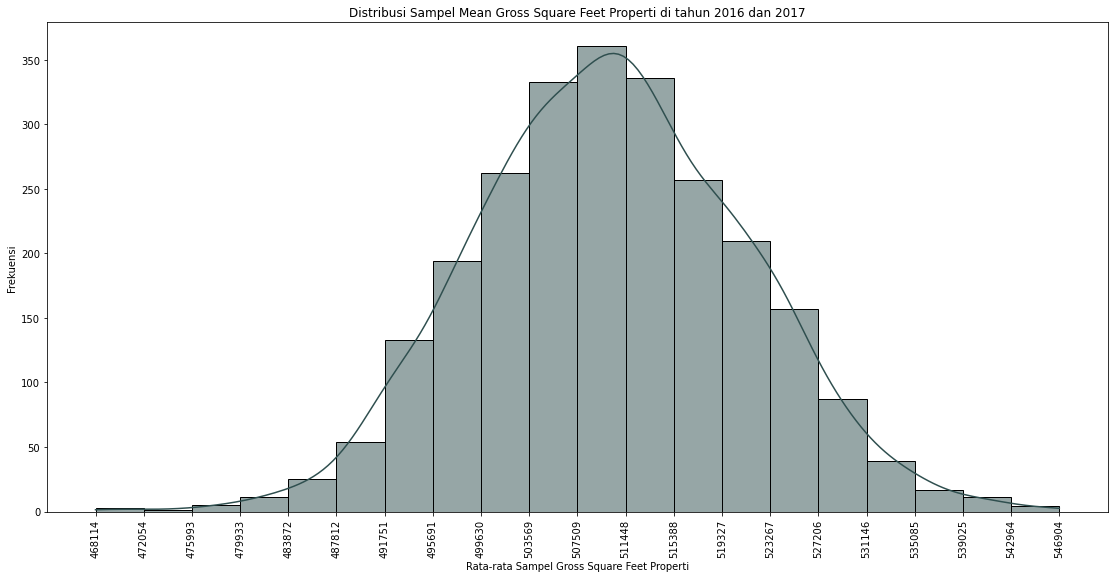

In [48]:
np.random.seed()
count, bin_edges = np.histogram(sample_means, bins=20)
fig = plt.figure(figsize=(19,9))
ax = fig.add_subplot(1,1,1)
sns.histplot(sample_means,kde=True, bins=20, color='darkslategrey')
ax.set_title('Distribusi Sampel Mean Gross Square Feet Properti di tahun 2016 dan 2017')
ax.set_xlabel('Rata-rata Sampel Gross Square Feet Properti')
ax.set_xticks(bin_edges)
ax.set_ylabel('Frekuensi')
ax.tick_params(axis='x', labelrotation=90)

Grafik di atas menunjukkan distribusi normal karena perbedaan nilai dari setiap ukuran central tendency (mean, median, modus) tidak terlalu signifikan dan grafik tersebut sudah dalam bentuk bell-shaped atau simetris

**Question**

Buatlah grafik distribusi probabilitas dari penjualan properti di wilayah Queens!

In [49]:
df_nyc['BOROUGH'].unique()

array(['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island'],
      dtype=object)

In [50]:
data_staten = df_nyc[df_nyc['BOROUGH'] == 'Queens']

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


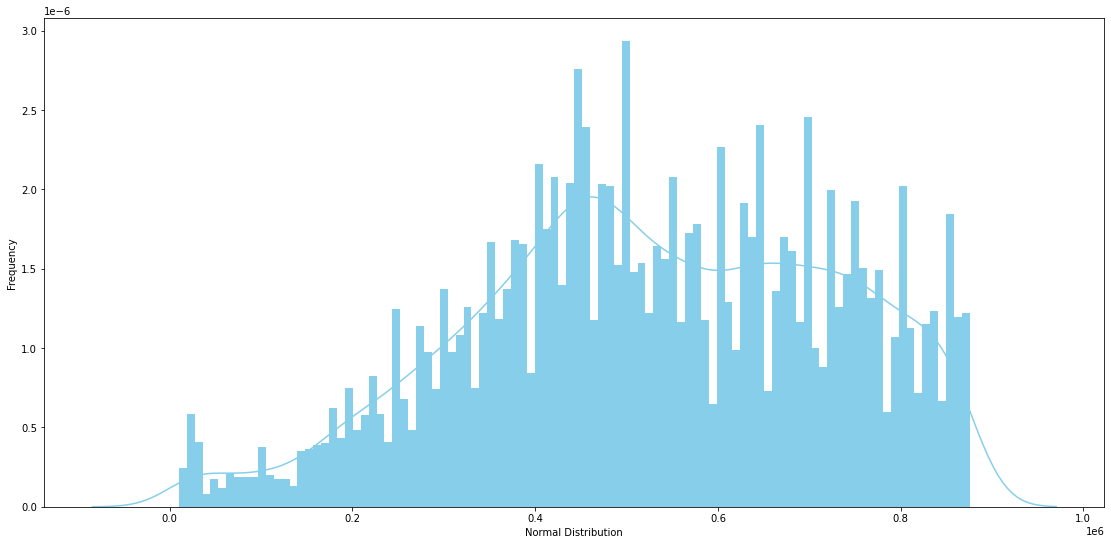

In [51]:
count, bin_ = np.histogram(sample_means, bins=20)
fig = plt.figure(figsize=(19,9))
ax = fig.add_subplot(1,1,1)
ax = sns.distplot(data_staten['SALE PRICE'], bins=100, kde=True, color='skyblue',
hist_kws={'linewidth': 15, 'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
plt.show()

Grafik di atas menunjukkan bukan merupakan distribusi normal karena grafik tersebut tidak dalam bentuk bell-shaped atau tidak simetris

---
# Confidence Intervals

**Question**

Buatlah confidence intervals (CI) sebesar 95% dari rata-rata harga penjualan properti di New York pada tahun 2016 - 2017!

**Pre-processing if needed** 

In [52]:
# menghitung standar deviasi populasi
pop_std_dev_mass = df_nyc['SALE PRICE'].std()
pop_std_dev_mass

201166.23994440006

In [53]:
# menghitung jumlah populasi
number_of_population = len(df_nyc)

In [54]:
# menghitung nilai mean dan standar deviasi dari sampel
mean_of_sampel_mean = np.mean(sample_means)
std_of_sampel_mean = np.std(sample_means)

In [55]:
# batas critical z_score dengan CI 95%
z_score = 1.96

In [56]:
# menghitung standard error sampel
standard_error_of_sample_mean = pop_std_dev_mass/np.sqrt(number_of_population)

In [57]:
# menghitung batas CI yang tepat
lower_bound_gross_square = np.mean(sample_means) - z_score*standard_error_of_sample_mean
upper_bound_gross_square = np.mean(sample_means) + z_score*standard_error_of_sample_mean
print(f'Left End Point : {lower_bound_gross_square}')
print(f'Right End Point : {upper_bound_gross_square}')

Left End Point : 507772.68939267244
Right End Point : 512655.32225417433


**Analisis :**
- Dengan keyakinan 95%, dapat diklaim bahwa penjualan properti rata-rata di New York adalah antara 507312.55 dan 512195,18 US Dollar.
- “Dengan keyakinan 95%, rata-rata berada pada interval (507312.5, 512195,18).”
- Ini berarti bahwa ketika sejumlah besar sampel dikumpulkan dan interval keyakinan dibuat untuk setiap sampel, sekitar 95% dari interval ini akan berisi $\mu$.

In [58]:
# membentuk fitur baru yaitu kolom 'SALE DATE' yang diurut secara ascending
df_nyc_sort_sale_date = df_nyc.copy()
df_nyc_sort_sale_date['SORTED SALE DATE'] = df_nyc['SALE DATE']
df_nyc_sort_sale_date.sort_values(by=['SORTED SALE DATE'], ascending=True, inplace = True)

In [59]:
df_nyc_selection = df_nyc_sort_sale_date[(df_nyc_sort_sale_date['SORTED SALE DATE'] < '2016-10-01') & 
                      (df_nyc_sort_sale_date['BOROUGH'] == 'Queens')]
df_nyc_selection2 = df_nyc_selection[['SALE PRICE']]

---
# Hypothesis Testing

**Question**

Apakah rata-rata harga jual bangunan di New York City selama 6 bulan kedepan sejak september 2016 membentuk distribusi normal?

**Pre-processing if needed** 

Populasi : Harga jual bangunan di New York City selama 6 bulan kedepan
Parameter of interest : p

Null Hypothesis (H0) : membentuk normal distribusi
Alternative Hypothesis (H1) : tidak membentuk normal distribusi

In [60]:
# menggunakan Shapiro-Wilk Test
from scipy.stats import shapiro
# normality test
stat, p = shapiro(df_nyc_selection2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret results
alpha = 0.05
if p > alpha:
    print('Sampel membentuk distribusi normal (tidak menolak H0)')
else:
    print('Sampel tidak membentuk distribusi normal (menolak H0)')

Statistics=0.980, p=0.000
Sampel tidak membentuk distribusi normal (menolak H0)


**Analisis:** p-value lebih kecil dari 0.05 (alpha), maka terjadi keputusan untuk menolak H0

---
# Overall Analysis

1. Dataset mengandung banyak sekali _Non-Standard Missing Values_ sehingga diperlukan proses EDA yang teliti
2. Dengan keyakinan 95%, dapat diklaim bahwa penjualan properti rata-rata di New York adalah antara 507312.55 dan 512195,18 US Dollar.
3. Dataset cenderung tidak membentuk Distribusi Normal dikarenakan data yang sangat beragam ditunjukkan dengan besarnya nilai dari standar deviasi, sehingga persebaran data setiap nilai terhadap nilai rata-rata sangat beragam.